In [1]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

In [2]:
def getHTMLContent(link):
    html = urlopen(link)
    soup = bs(html, 'html.parser')
    return soup

In [3]:
soup = getHTMLContent('https://www.immobiliare.it/vendita-case/bologna-provincia/')

In [5]:
linklist = []
for link in soup.find_all('a'):
    linkURL = link.get('href')
    if linkURL is not None:
        if link.get('href').startswith('https://www.immobiliare.it/7047'):
            linklist.append(link.get('href'))

In [6]:
linklist

['https://www.immobiliare.it/70476914-Vendita-Appartamento-via-Carlo-Cignani-Bologna.html',
 'https://www.immobiliare.it/70478990-Vendita-Quadrilocale-via-delle-Tovaglie-Bologna.html',
 'https://www.immobiliare.it/70478908-Vendita-Trilocale-via-Delle-Fonti-Bologna.html',
 'https://www.immobiliare.it/70478888-Vendita-Monolocale-via-Senzanome-Bologna.html',
 'https://www.immobiliare.it/70479002-Vendita-Appartamento-via-Malvezza-Bologna.html',
 'https://www.immobiliare.it/70478952-Vendita-Bilocale-via-Sant-Apollinare-1146-Valsamoggia.html',
 'https://www.immobiliare.it/70478906-Vendita-Monolocale-via-Saliceto-Bologna.html',
 'https://www.immobiliare.it/70478996-Vendita-Bilocale-via-Ferrarese-Bologna.html',
 'https://www.immobiliare.it/70478988-Vendita-Appartamento-viale-Aldini-Bologna.html',
 'https://www.immobiliare.it/70478904-Vendita-Bilocale-via-XXI-Aprile-Bologna.html',
 'https://www.immobiliare.it/70478986-Vendita-Quadrilocale-via-Santo-Stefano-Bologna.html',
 'https://www.immobilia

# Make a dataset of information

In [151]:
def get_info(number):
    index = (number - 1)*25  + 1
    col_names=['price','locali','superficie','bagni','piano']
    df = pd.DataFrame(columns = col_names)
    
    soup = getHTMLContent('https://www.immobiliare.it/vendita-case/bologna-provincia/?pag=' + str(number))
    read_content = False

    for ul in soup.find_all('ul'):
        if (ul.get('class') == ["annunci-list"] and not read_content):
            for div in ul.find_all('div'):
                if (div.get('class')==['listing-item_body--content']):

                    d = {}

                    for li in div.find_all('li'): #Now, we are in each rooms

                        if '€' in li.get_text().split():                         
                            a = li.get_text().split()[-1]
                            try:
                                a = flaot(a)
                            
                            except NameError:
                                try:
                                    a = float(a.split('(')[0])
                                except ValueError :
                                    a = a.split('.')
                                    a.pop()
                                    a = float(''.join(a))

                            d['price'] = a
                            

                        for div2 in li.find_all('div'):

                            if div2.get_text() == 'locali': # check 'locali'
                                d['locali'] = float(li.get_text()[0])

                            if div2.get_text() == 'superficie': # check 'superficie'
                                try:
                                    d['superficie'] = float(li.get_text().split()[0])
                                except:
                                    d['superficie'] = float('nan')
                                

                            if div2.get_text() == 'bagni': # check 'bagni'
                                d['bagni'] = float(li.get_text()[0])

                            if div2.get_text() == 'piano': # check 'piano'
                                try:
                                    d['piano'] = float(li.get_text()[0])
                                except:
                                    
                                    pass
                                
# Must implement for A,S,R,T piano!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# T = 1, S = top, A = , R = 
                                
                                
                    d = pd.DataFrame(d, index=[index])
                    index += 1
                    df = df.append(d, sort=False)
                    
    return df

In [152]:
col_names=['price','locali','superficie','bagni','piano']
ds_info = pd.DataFrame(columns=col_names)

start = time.time()

for i in range(1, 402):
    df = get_info(i)
    ds_info = ds_info.append(df, sort=False)
    
end = time.time()
print('%.3f' %(end-start))

1078.590


In [306]:
ds_info['piano'].value_counts()

1.0    1640
2.0    1124
3.0     577
4.0     270
5.0     124
6.0      65
7.0      35
8.0      17
9.0       7
Name: piano, dtype: int64

In [307]:
ds_slow['piano'].value_counts()

1    1640
2    1124
T     911
A     595
3     577
R     400
4     270
5     124
6      65
S      57
7      35
8      17
9       7
Name: piano, dtype: int64

In [233]:
infodata.head()

,price,locali,superficie,bagni,piano
0,590.000,3,170,2,3
1,12.500,1,9,NaN,NaN
2,220.000,4,140,2,1
3,830.000,5,245,3,A
4,18.000,1,24,NaN,NaN


# Dataset of description

In [221]:
soup = getHTMLContent('https://www.immobiliare.it/vendita-case/bologna-provincia/?pag=1')
read_content = False

for ul in soup.find_all('ul'):
    if (ul.get('class') == ["annunci-list"] and not read_content):
        for link in ul.find_all('a'):
            linkURL = link.get('href')
            if linkURL is not None:
                soup = getHTMLContent(linkURL)
                
                for div in soup.find_all('div'):
                    
                    if (div.get('class')==['left-side']):
                        for div2 in div.find_all('div'):
                            for p in div2.find_all('p'):
                                if p.get('class') == ['text-center']:
                                    letters = div2.get_text().split()
                                    del letters[-2:]
                print('change')

['Direttamente', 'dalla', 'Proprietà', 'vendesi', 'in', 'palazzo', 'signorile', 'e', 'silenzioso', 'situato', 'fuori', 'da', 'zona', 'ZTL', 'appartamento', 'in', 'ottime', 'condizioni', 'e', 'perfettamente', 'tenuto,', 'di', 'ampia', 'metratura', 'e', 'molto', 'luminoso,', 'situato', 'al', 'terzo', 'piano', 'con', 'ascensore.', 'Stato', 'occupazionale:', 'libero.', "E'", 'composto', 'da', 'ingresso,', 'ampio', 'salone,', 'cucina', 'abitabile,', 'due', 'ampie', 'camere', 'matrimoniali,', 'una', 'camera', 'singola,', 'studio,', 'due', 'bagni', 'finestrati', 'con', 'doccia', 'e', 'vasca,', 'ampio', 'balcone,', '2', 'cantine.', 'Aria', 'condizionata', 'e', 'radiatori', 'già', 'dotati', 'di', 'contacalorie', 'per', 'una', 'gestione', 'autonoma', 'del', 'riscaldamento.', 'Affacci', 'su', 'via', 'Riva', 'Reno/Via', 'Grada/Via', 'San', 'Felice.', 'Posizione', 'strategica,', 'vicinissima', 'a', 'negozi', 'ed', 'al', 'centro', 'storico,', 'raggiungibile', 'comodamente', 'a', 'piedi', '(15', 'min

['Rif.', 'SS141:', 'Via', 'Solferino.', 'in', 'zona', 'di', 'pregio,', 'interna', 'e', 'silenziosa', 'proponiamo,', 'in', 'antico', 'stabile', 'porticato', 'del', "'700,", 'appartamento', 'trilocale', 'da', 'ristrutturare', 'al', 'piano', 'terra', 'composto', 'da', 'ingresso,', 'soggiorno,', 'cucinotto,', '2', 'camere,', 'bagno', 'finestrato', 'e', 'cortile', 'privato', 'interno', 'pavimentato.', "L'abitazione", 'dispone', 'di', 'pavimentazione', 'in', 'ceramica,', 'infissi', 'in', 'alluminio', 'vetro', 'singolo,', 'e', 'termo', 'autonomo', 'con', 'bassissime', 'spese', 'di', 'condominio.', 'Ampia', 'possibilità', 'di', 'personalizzazione.', 'Ottima', 'soluzione', 'da', 'investimento.', 'Completa', 'la', 'proprietà', "un'ampia", 'cantina', 'di', '22', 'mq.', 'Libero', 'Subito!', 'La', 'Geolocalizzazione', 'dell’immobile', 'potrebbe', 'essere', 'approssimativa.', 'MACHINA', 'S.r.l.', 'Affiliato', 'Tempocasa', 'Via', 'Laura', 'Bassi', 'Veratti', '30/C', '-', 'Bologna', 'Tel.', '329', '78

['Mob', '392', '9999666', 'Mob', '349', '2250729', '-', '347', '7101929', 'Acquisto', 'assistito', 'in', 'Asta', 'Giudiziaria', '-', 'Referente', 'procedura', 'Mob.', '392', '9999666', '-', 'Mob.', '349', '2250729', '-', '347', '7101929', '-', 'www.homeagency.it', '-', 'Valore', 'commerciale', '€', '290.000,00', 'IMMOBILE', 'LIBERO', 'AL', 'DECRETO', 'DI', 'TRASFERIMENTO', 'UBICAZIONE', 'E', "REGOLARITA'", 'URBANISTICA:', '•', 'Costruzione', '1998', '•', 'Costruita', 'con', 'regolare', 'Concessione', 'Edilizia', '•', 'Autorizzazione', 'Uso', '2001', 'Via', 'Giovanni', 'Papini,', '26/2', '-', 'BOLOGNA', 'quartiere', 'Navile', 'zona', 'Corticella', '•', 'Piano', 'Primo:', 'ingresso,', 'soggiorno/pranzo,', 'cucinotto,', 'disimpegno,', 'due', 'bagni,', 'due', 'camere.', 'Mq', '86,66', '•', 'Piano', 'Primo:', 'loggia.', 'Mq', '6.80', '•', 'Piano', 'Interrato:', 'cantina.', 'Mq', '8.32', '•', 'Piano', 'Interrato:', 'autorimessa.', 'Mq', '14,30', 'Il', 'nostro', 'studio', 'offre', 'la', 'comp

['Mob', '392', '9999666', 'Mob', '349', '2250729', '-', '347', '710192', 'Acquisto', 'assistito', 'in', 'Asta', 'Giudiziaria', '-', 'Referente', 'procedura', 'Mob.', '392', '9999666', '-', 'Mob.', '349', '2250729', '-', '347', '7101929', '-', 'www.homeagency.it', '-', 'Valore', 'commerciale', '€', '240.000,00', 'IMMOBILE', 'LIBERO', 'AL', 'DECRETO', 'DI', 'TRASFERIMENTO', 'UBICAZIONE', 'E', "REGOLARITA'", 'URBANISTICA:', '•', 'Costruzione', 'Ante', '"67', '•', 'Costruita', 'con', 'regolare', 'Concessione', 'Edilizia', '•', 'DIA', 'Ristrutturazione', 'Edilizia', 'e', 'cambio', 'destinazione', 'da', 'magazzino', 'ad', 'abitazione', '2008', '•', 'Richiesta', 'proroga', 'termini', 'ultimazione', 'lavori', '2012', 'Via', 'Travallino,', '1', '-', 'BARICELLA', 'frazione', 'Cittadella', '•', 'Piano', 'Interrato:', 'cantina,', 'disimpegno,', 'ripostiglio,', 'bagno,', 'lavanderia.', 'Mq', '80,00', '•', 'Piano', 'Terra:', 'ingresso', 'su', 'soggiorno,', 'cucina,', 'disimpegno,', 'bagno,', 'due', 

['Mob', '392', '9999666', 'Mob', '349', '2250729', '-', '347', '7101929', 'Acquisto', 'assistito', 'in', 'Asta', 'Giudiziaria', '-', 'Referente', 'procedura', 'Mob.', '392', '9999666', '-', 'Mob.', '349', '2250729', '-', '347', '7101929', '-', 'www.homeagency.it', '-', 'Valore', 'commerciale', '€', '200.000,00', 'IMMOBILE', 'LIBERO', 'AL', 'DECRETO', 'DI', 'TRASFERIMENTO', 'UBICAZIONE', 'E', "REGOLARITA'", 'URBANISTICA:', '•', 'Costruzione', 'Ante', '"67', '•', 'Costruita', 'con', 'regolare', 'Concessione', 'Edilizia', '1956', '•', 'Certificato', 'Abitabilità', 'e', 'Usabilità', '1957', 'Via', 'Cavallieri', 'Ducati,', '8', '-', 'BOLOGNA', 'quartiere', 'Borgo', 'Panigale', '(BO)', '•', 'Piano', 'Terzo:', 'ingresso,', 'soggiorno/pranzo,', 'cucinotto', 'con', 'balcone,', 'disimpegno,', 'ripostiglio,', 'bagno,', 'due', 'camere.', 'Mq', '80,00', 'Il', 'nostro', 'studio', 'offre', 'la', 'completa', 'assistenza', 'per', "l'acquisto", 'in', 'Asta', 'anche', 'tramite', 'MUTUI', 'BANCARI.', 'Ass

['Mob', '392', '9999666', 'Mob', '349', '2250729', '-', '347', '7101929', 'Acquisto', 'assistito', 'in', 'Asta', 'Giudiziaria', '-', 'Referente', 'procedura', 'Mob.', '392', '9999666', '-', 'Mob.', '349', '2250729', '-', '347', '7101929', '-', 'www.homeagency.it', '-', 'Valore', 'commerciale', '€', '160.000,00', 'IMMOBILE', 'LIBERO', 'AL', 'DECRETO', 'DI', 'TRASFERIMENTO', 'UBICAZIONE', 'E', "REGOLARITA'", 'URBANISTICA:', '•', 'Costruzione', 'Ante', '"67', '•', 'Costruita', 'con', 'regolare', 'Concessione', 'Edilizia', '•', 'Comunicazione', 'inizio', 'lavori', 'manutenzione', '1995', 'Via', 'Circonvallazione', 'Est,', '10', '-', 'CASTELLO', "D'ARGILE", '(BO)', '•', 'Piano', 'Secondo:', 'ingresso,', 'soggiorno', 'con', 'angolo', 'cottura,', 'disimpegno,', 'bagno,', 'due', 'camere.', 'Mq', '69,00', '•', 'Piano', 'Secondo:', 'balcone.', 'Mq', '3,00', '•', 'Piano', 'Seminterrato:', 'cantina.', 'Mq', '8,00', 'Il', 'nostro', 'studio', 'offre', 'la', 'completa', 'assistenza', 'per', "l'acquis

['CENTRO', 'STORICO', '-', 'AD.ZE', 'TRIBUNALE', 'Rif:', 'B034', '-', 'In', 'palazzina', 'storica', 'di', 'fine', "'800,", 'mantenuta', 'ottimamente', 'nelle', 'sue', 'parti', 'comuni,', 'è', 'disponibile', 'per', "l'acquisto", 'al', 'primo', 'piano', 'con', 'ascensore,', 'quadrilocale', 'con', 'triplo', 'affaccio', 'principalmente', 'su', 'un', 'interno,', 'formato', 'da:', 'ingresso,', 'soggiorno,', 'sala', '/', 'studio,', 'cucinotto,', 'disimpegno,', 'due', 'camere,', 'bagno', 'e', 'cantina,', 'per', 'una', 'superficie', 'di', 'circa', '120', 'mq.', 'Libero', 'a', 'Dicembre', '2018.', 'Riscaldamento', 'autonomo,', 'impianti', 'a', 'norma,', 'APE', 'in', 'fase', 'di', 'rilascio.', 'POSSIBILITÀ', 'ANCHE', 'PARZIALE', 'AD', 'USO', 'UFFICIO.', 'RIF.:', 'B034.', 'Prezzo:', 'Euro', '420.000', 'Leggi', 'tutto']
change
['BOLOGNA', '-', 'CORTICELLA', 'Rif:', 'B050', '-', 'Corticella', '-', 'VIA', 'DELLE', 'FONTI', '-', 'con', 'entrata', 'indipendente', 'In', 'tranquillo', 'interno', 'Triloca

['CASTELLETTO', '-', '2', 'APPARTAMENTI', 'A', '83.000', 'EURO', 'Valsamoggia', '-', 'Loc.', 'Castelletto', 'AFFARE', 'ANCHE', 'PER', 'INVESTITORI', 'A', 'pochi', 'passi', 'dal', 'centro,', 'vi', 'consigliamo', "l'acquisto", 'di', '2', 'APPARTAMENTI', 'alla', 'interessante', 'cifra', 'di', 'euro', '83.000', 'complessiva', '-', 'PRIMO', 'APPARTAMENTO', '-', 'BILOCALE', 'al', 'piano', 'primo', 'di', 'circa', '55,00', 'mq', '+', '5', 'mq', 'di', 'terrazzo', 'con', 'vista', 'sul', 'verde,', 'composto', 'da', 'soggiorno,', 'cucinotto,', 'disimpegno,', '1', 'bagno,', '1', 'camera.', "L'immobile", 'è', 'termoautonomo', 'con', 'caldaia', 'nuova', '(2017)', '-', 'SECONDO', 'APPARTAMENTO', '-', 'MONOLOCALE', 'al', 'piano', 'secondo', '(ex', 'sottotetto', 'condonato', 'ad', 'abitativo)', 'di', 'circa', '33,00', 'mq', 'con', 'bagno.', "L'immobile", 'è', 'termoautonomo.', 'Entrambi', 'accedono', 'dal', 'vano', 'scala', 'condominiale.', 'Classe', 'energetica', '"G"', 'eptot', '367,60.', 'Liberi', 's

# pre-processing

In [161]:
aaa = ds_info.fillna(0)

In [168]:
aaa

In [ ]:
infomat = np.array(infodata)

In [88]:
infomat

array([['590.000', '3', '170', '2', '3'],
       ['12.500', '1', '9', nan, nan],
       ['220.000', '4', '140', '2', '1'],
       ...,
       ['170.000', '3', '93', '1', '1'],
       ['160.000', '3', '80', '1', '1'],
       ['135.000', '3', '88', '2', 'A']], dtype=object)

# Clustering 

In [286]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [163]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(aaa)

In [270]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(aaa)
    wcss.append(kmeans.inertia_) 

In [271]:
wcss

[26602334895.13597,
 1722450854.1354463,
 837796653.3378803,
 500143750.8484529,
 352383554.64905363,
 267950430.7642337,
 208119379.88039985,
 166007301.55652857,
 133902894.49253659,
 113734467.8821529]

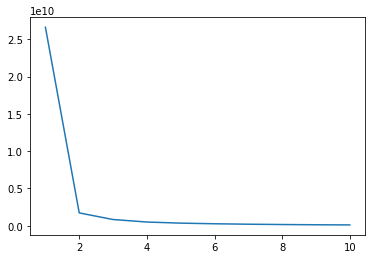

In [272]:
plt.plot(range(1,11), wcss)

## only one cluster is tooooooo big

In [284]:
distances = []

# from 2 clusters 
p1=np.array([2,wcss[1]])
p2=np.array([10,wcss[9]])

for i in range(1,10):
    p3 = np.array([i+1,wcss[i]])
    d = abs(np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1))
    distances.append(d)

In [285]:
distances

[0.0,
 3.3993047294454635,
 4.07842184604709,
 3.8132198375987687,
 3.233098068995241,
 2.5306324331384724,
 1.7400519613224341,
 0.8997042522461972,
 0.0]

## the number of clusters, 4 has the maximum number 
## So, 4 is the optimal number

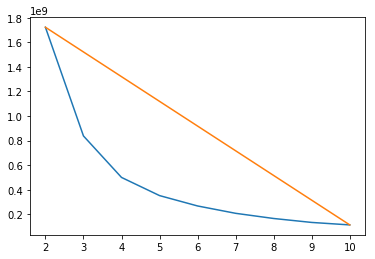

In [283]:
plt.plot(range(2,11), wcss[1:])
plt.plot([2, 10],[wcss[1], wcss[9]] )

In [287]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(aaa)

In [288]:
centroids = kmeans.cluster_centers_

In [289]:
centroids

array([[2.01610918e+02, 3.42694912e+00, 1.21209332e+02, 1.43775934e+00,
        8.34789255e-01],
       [1.58000000e+05, 3.00000000e+00, 6.50000000e+01, 2.00000000e+00,
        0.00000000e+00],
       [3.00000000e+04, 1.00000000e+00, 2.40000000e+01, 3.00000000e+00,
        0.00000000e+00],
       [8.27152645e+02, 4.74913295e+00, 3.10433876e+02, 2.48901734e+00,
        5.87283237e-01]])

In [302]:
import sys
col_names=['price','locali','superficie','bagni','piano']
cluster_info = pd.DataFrame(centroids,columns=col_names)
result = np.savetxt(sys.stdout, centroids, '%5.2f')

201.61  3.43 121.21  1.44  0.83
158000.00  3.00 65.00  2.00  0.00
30000.00  1.00 24.00  3.00  0.00
827.15  4.75 310.43  2.49  0.59


In [305]:
round(cluster_info,2)

,price,locali,superficie,bagni,piano
0,201.61,3.43,121.21,1.44,0.83
1,158000.00,3.00,65.00,2.00,0.00
2,30000.00,1.00,24.00,3.00,0.00
3,827.15,4.75,310.43,2.49,0.59


# Comparison among cluster